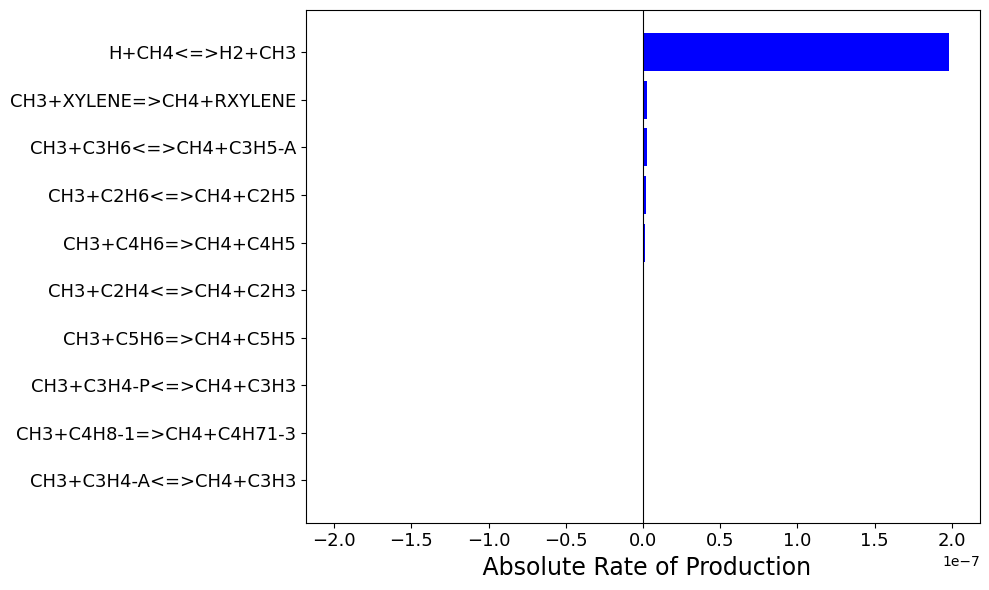

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = "./data/PE_ROP_CH4.csv"
df = pd.read_csv(file_path)

# 정렬: 절대값 기준 상위 20개
top_n = 10
df_sorted = df.reindex(df[" Absolute Rate of Production"].abs().sort_values(ascending=False).index).head(top_n)
colors = ['blue' if val > 0 else 'red' for val in df_sorted[' Absolute Rate of Production']]
max_val = df_sorted[' Absolute Rate of Production'].abs().max()

# 그래프
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Reaction'], df_sorted[' Absolute Rate of Production'], color=colors)
plt.gca().invert_yaxis()
plt.xlim(-max_val * 1.1, max_val * 1.1)

# 폰트 크기 조정
plt.xlabel(" Absolute Rate of Production", fontsize=17)
plt.xticks(fontsize=13)       # x축 숫자 폰트
plt.yticks(fontsize=13)       # Reaction 이름 폰트

plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.savefig('./fig/PE_ROP_CH4.pdf', bbox_inches='tight')
plt.show()


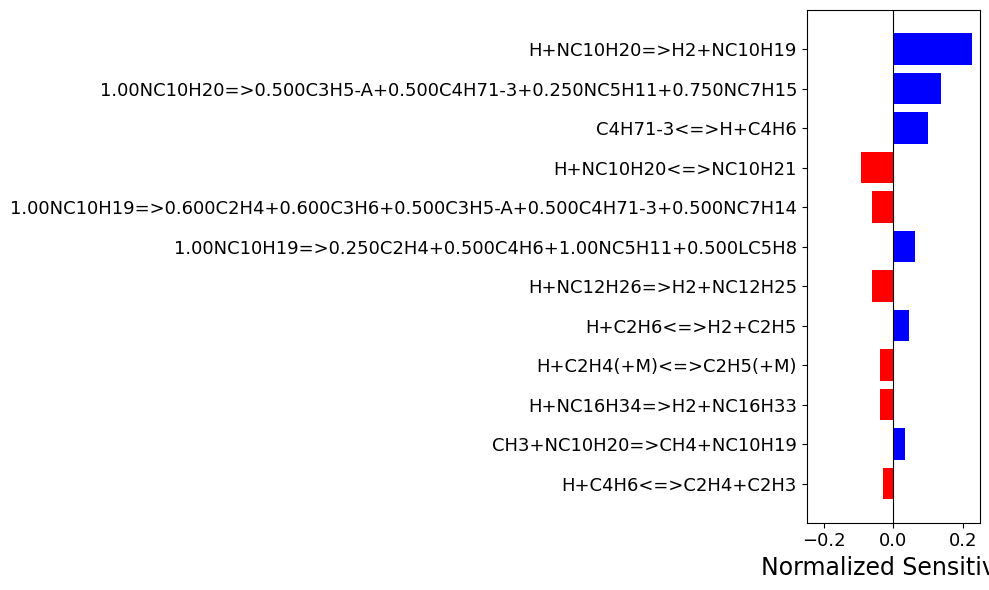

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = "./data/PE_1773K_NOS_C4H6.csv"
df = pd.read_csv(file_path)

# 정렬: 절대값 기준 상위 20개
top_n = 20
df_sorted = df.reindex(df["Normalized Sensitivity"].abs().sort_values(ascending=False).index).head(top_n)
colors = ['blue' if val > 0 else 'red' for val in df_sorted['Normalized Sensitivity']]
max_val = df_sorted['Normalized Sensitivity'].abs().max()

# 그래프
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Reaction'], df_sorted['Normalized Sensitivity'], color=colors)
plt.gca().invert_yaxis()
plt.xlim(-max_val * 1.1, max_val * 1.1)

# 폰트 크기 조정
plt.xlabel("Normalized Sensitivity", fontsize=17)
plt.xticks(fontsize=13)       # x축 숫자 폰트
plt.yticks(fontsize=13)       # Reaction 이름 폰트

plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.savefig('./fig/PE_1773K_NOS_C4H6.pdf', bbox_inches='tight')
plt.show()


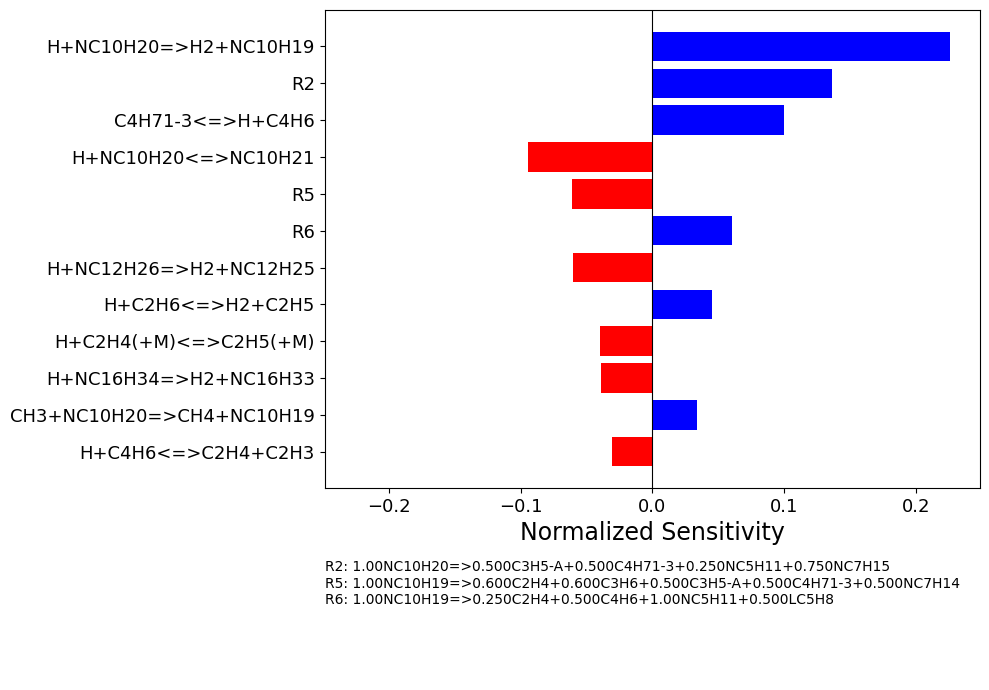

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import textwrap

# CSV 파일 경로
file_path = "./data/PE_1773K_NOS_C4H6.csv"
df = pd.read_csv(file_path)

# 정렬: 절대값 기준 상위 20개
top_n = 20
df_sorted = df.reindex(df["Normalized Sensitivity"].abs().sort_values(ascending=False).index).head(top_n)

colors = ['blue' if val > 0 else 'red' for val in df_sorted['Normalized Sensitivity']]
max_val = df_sorted['Normalized Sensitivity'].abs().max()

# ================================
# 긴 반응식 처리
# ================================
short_labels = []
annotations = []
label_limit = 35   # 표시할 최대 길이 (넘으면 축약)
wrap_labels = False  # True로 바꾸면 자동 줄바꿈 모드

for i, r in enumerate(df_sorted['Reaction'], start=1):
    if wrap_labels:
        # 자동 줄바꿈 모드
        short_labels.append("\n".join(textwrap.wrap(r, 30)))
    else:
        # 축약 모드
        if len(r) > label_limit:
            short_labels.append(f"R{i}")
            annotations.append(f"R{i}: {r}")
        else:
            short_labels.append(r)

df_sorted['Short Reaction'] = short_labels

# ================================
# 그래프 + 라벨 영역 분리 (비율 고정)
# ================================
fig = plt.figure(figsize=(10, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])  # 그래프:주석 = 4:1 비율

# 위쪽: 그래프
ax1 = fig.add_subplot(gs[0])
ax1.barh(df_sorted['Short Reaction'], df_sorted['Normalized Sensitivity'], color=colors)
ax1.invert_yaxis()
ax1.set_xlim(-max_val * 1.1, max_val * 1.1)

ax1.set_xlabel("Normalized Sensitivity", fontsize=17)
ax1.tick_params(axis='x', labelsize=13)
ax1.tick_params(axis='y', labelsize=13)
ax1.axvline(0, color='black', linewidth=0.8)

# 아래쪽: 주석 영역
ax2 = fig.add_subplot(gs[1])
ax2.axis("off")

if annotations:
    note_text = "\n".join(annotations)
    ax2.text(0, 1, note_text, ha="left", va="top", fontsize=10, wrap=True)

plt.tight_layout()
plt.savefig('./fig/PE_1773K_NOS_C4H6.pdf', bbox_inches='tight')
plt.show()


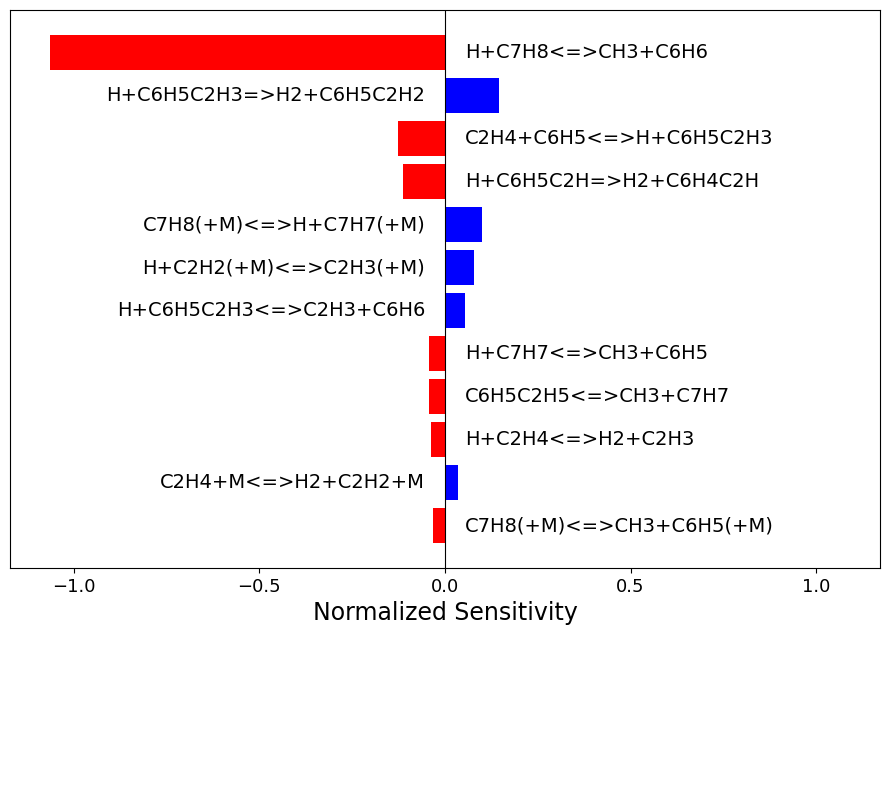

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# CSV 파일 경로
file_path = "./data/PS_NOS_C7H8.csv"
df = pd.read_csv(file_path)

# 정렬: 절대값 기준 상위 20개
top_n = 20
df_sorted = df.reindex(
    df["Normalized Sensitivity"].abs().sort_values(ascending=False).index
).head(top_n)

colors = ['blue' if val > 0 else 'red' for val in df_sorted['Normalized Sensitivity']]
max_val = df_sorted['Normalized Sensitivity'].abs().max()

# ================================
# 긴 반응식 처리
# ================================
annotations = []   # 긴 반응식 주석용
label_limit = 35   # 긴 반응식 기준

# ================================
# 그래프 + 주석 영역
# ================================
fig = plt.figure(figsize=(9, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])  # 그래프:주석 = 4:1

# 위쪽: 그래프
ax1 = fig.add_subplot(gs[0])
bars = ax1.barh(range(len(df_sorted)), df_sorted['Normalized Sensitivity'], color=colors)
ax1.invert_yaxis()
ax1.set_xlim(-max_val * 1.1, max_val * 1.1)

# 축/폰트 설정
ax1.set_xlabel("Normalized Sensitivity", fontsize=17)
ax1.tick_params(axis='x', labelsize=13)
ax1.set_yticks([])   # y축 라벨 제거
ax1.axvline(0, color='black', linewidth=0.8)

# ================================
# 그래프 안쪽에 텍스트 배치
# ================================
long_idx = 1
for i, (val, reaction) in enumerate(
    zip(df_sorted['Normalized Sensitivity'], df_sorted['Reaction'])
):
    if len(reaction) > label_limit:
        # 긴 반응식 → R{i}만 그래프 안쪽에 표시, 원문은 주석 저장
        tag = f"R{long_idx}"
        annotations.append(f"{tag}: {reaction}")
        long_idx += 1

        if val > 0:
            ax1.text(-max_val*0.05, i, tag, ha='right', va='center', fontsize=14, color='black')
        else:
            ax1.text(max_val*0.05, i, tag, ha='left', va='center', fontsize=14, color='black')
    else:
        # 짧은 반응식 → 그래프 안쪽에 그대로 표시
        if val > 0:
            ax1.text(-max_val*0.05, i, reaction, ha='right', va='center', fontsize=14, color='black')
        else:
            ax1.text(max_val*0.05, i, reaction, ha='left', va='center', fontsize=14, color='black')

# ================================
# 아래쪽: 주석 영역 (긴 반응식 원문 표시)
# ================================
ax2 = fig.add_subplot(gs[1])
ax2.axis("off")

if annotations:
    note_text = "\n".join(annotations)
    ax2.text(0, 1, note_text, ha="left", va="top", fontsize=10, wrap=True)

plt.tight_layout()
plt.savefig('./fig/PS_2273K_NOS_C7H8.pdf', bbox_inches='tight')
plt.show()
